Dataset shape: (600, 2)
First 5 rows:
 [[ 2.51007584  2.15930271]
 [ 3.73977608  0.97417528]
 [-0.14293029  2.96086573]
 [ 2.81792943  2.2680129 ]
 [ 2.30240726  2.11961852]]


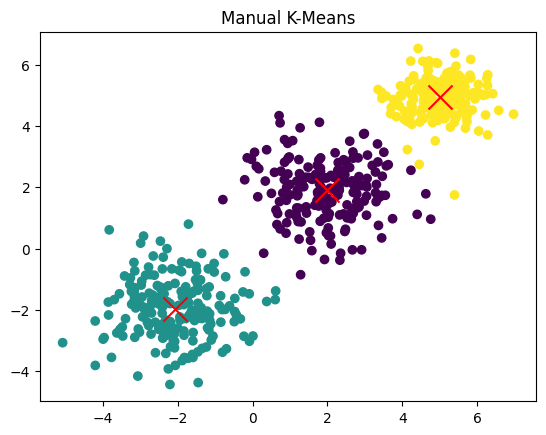

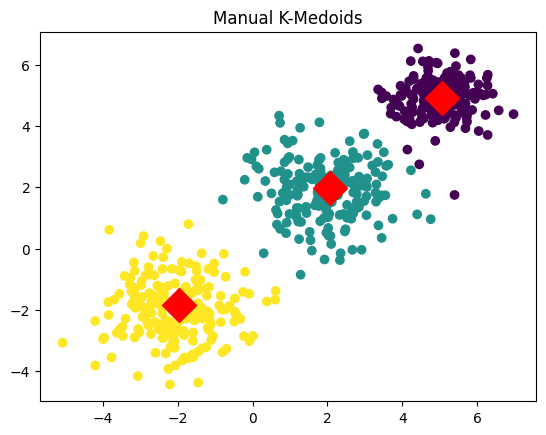

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x793de1d25940>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e

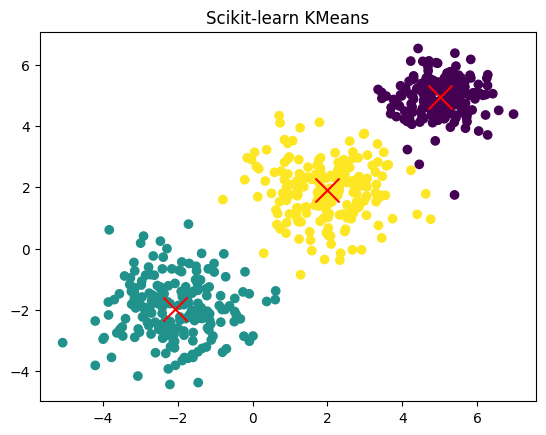

KMeans Iterations: 3
KMeans Inertia: 893.0317674104796

=== Summary ===
Manual K-Means Labels: [0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# ===========================================
# Step 2: Load Dataset from Uploaded File
# ===========================================
data = np.loadtxt("dataset2d.txt", delimiter=",")
print("Dataset shape:", data.shape)
print("First 5 rows:\n", data[:5])

# ===========================================
# Part 1: Manual K-Means from Scratch
# ===========================================
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def compute_distances(X, centroids):
    return cdist(X, centroids, 'euclidean')

def assign_clusters(distances):
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        new_centroids = update_centroids(X, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

k = 3
centroids, labels = k_means(data, k)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=300)
plt.title("Manual K-Means")
plt.show()

# ===========================================
# Part 2: Manual K-Medoids from Scratch
# ===========================================
def total_cost(X, medoids, labels):
    return sum(np.linalg.norm(X[i] - medoids[labels[i]]) for i in range(len(X)))

def k_medoids(X, k, max_iters=100):
    m = np.random.choice(len(X), k, replace=False)
    medoids = X[m]
    for _ in range(max_iters):
        distances = compute_distances(X, medoids)
        labels = assign_clusters(distances)
        best_cost = total_cost(X, medoids, labels)
        updated = False
        for i in range(len(X)):
            if i in m: continue
            for j in range(k):
                temp_medoids = medoids.copy()
                temp_medoids[j] = X[i]
                temp_labels = assign_clusters(compute_distances(X, temp_medoids))
                cost = total_cost(X, temp_medoids, temp_labels)
                if cost < best_cost:
                    m[j] = i
                    medoids = X[m]
                    updated = True
        if not updated:
            break
    final_labels = assign_clusters(compute_distances(X, medoids))
    return medoids, final_labels

medoids, medoid_labels = k_medoids(data, k)

plt.scatter(data[:, 0], data[:, 1], c=medoid_labels, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='D', s=300)
plt.title("Manual K-Medoids")
plt.show()

# ===========================================
# Part 3: Scikit-learn KMeans (Only)
# ===========================================
sk_kmeans = KMeans(n_clusters=k, random_state=0).fit(data)

plt.scatter(data[:, 0], data[:, 1], c=sk_kmeans.labels_, cmap='viridis')
plt.scatter(sk_kmeans.cluster_centers_[:, 0], sk_kmeans.cluster_centers_[:, 1], c='red', s=300, marker='x')
plt.title("Scikit-learn KMeans")
plt.show()

print("KMeans Iterations:", sk_kmeans.n_iter_)
print("KMeans Inertia:", sk_kmeans.inertia_)

# ===========================================
# Part 4: Final Comparison Summary
# ===========================================
print("\n=== Summary ===")
print("Manual K-Means Labels:", labels)
print("Manual K-Medoids Labels:", medoid_labels)
print("KMeans Inertia (scikit-learn):", sk_kmeans.inertia_)


# **Task 2: Clustering on Wholesale Customers Dataset**

In [6]:
# Step 1: Install and Import
!pip install ucimlrepo --quiet
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

# Step 2: Load the dataset
wholesale = fetch_ucirepo(id=292)
X = wholesale.data.features.copy()
print("Dataset shape:", X.shape)
X.head()


Dataset shape: (440, 7)


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


# Step 3: Normalize Data

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Step 4: Manual K-Medoids Implementation (Reused)

In [8]:
def compute_distances(X, medoids):
    return cdist(X, medoids, 'euclidean')

def assign_clusters(distances):
    return np.argmin(distances, axis=1)

def total_cost(X, medoids, labels):
    return sum(np.linalg.norm(X[i] - medoids[labels[i]]) for i in range(len(X)))

def k_medoids(X, k, max_iters=100):
    m = np.random.choice(len(X), k, replace=False)
    medoids = X[m]
    for _ in range(max_iters):
        distances = compute_distances(X, medoids)
        labels = assign_clusters(distances)
        best_cost = total_cost(X, medoids, labels)
        updated = False
        for i in range(len(X)):
            if i in m: continue
            for j in range(k):
                temp_medoids = medoids.copy()
                temp_medoids[j] = X[i]
                temp_labels = assign_clusters(compute_distances(X, temp_medoids))
                cost = total_cost(X, temp_medoids, temp_labels)
                if cost < best_cost:
                    m[j] = i
                    medoids = X[m]
                    updated = True
        if not updated:
            break
    final_labels = assign_clusters(compute_distances(X, medoids))
    return medoids, final_labels


# Step 5: Apply All Clustering Methods

In [9]:
k = 3
results = {}

# KMeans
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
results['KMeans'] = {
    'labels': kmeans.labels_,
    'score': silhouette_score(X_scaled, kmeans.labels_)
}

# Manual K-Medoids
medoids, medoid_labels = k_medoids(X_scaled, k)
results['KMedoids'] = {
    'labels': medoid_labels,
    'score': silhouette_score(X_scaled, medoid_labels)
}

# Agglomerative Clustering (single, complete, average)
linkages = ['single', 'complete', 'average']
for linkage in linkages:
    agg = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    labels = agg.fit_predict(X_scaled)
    results[f'Agglomerative-{linkage}'] = {
        'labels': labels,
        'score': silhouette_score(X_scaled, labels)
    }


# Step 6: Visualize Clusters using PCA

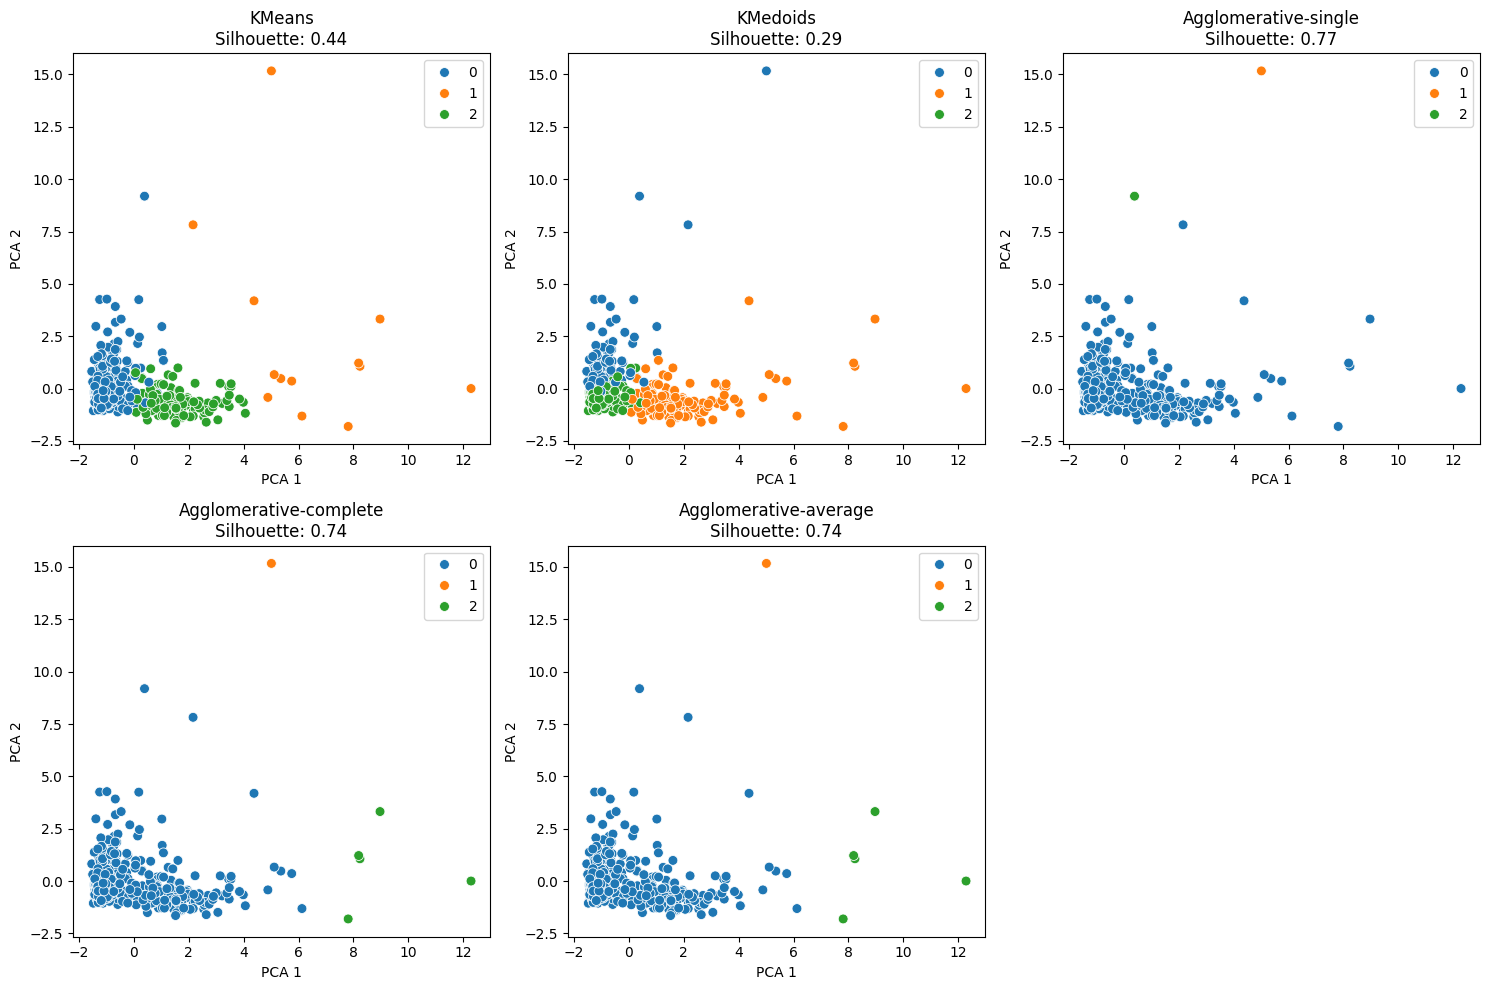

In [10]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 10))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=res['labels'], palette='tab10', s=50)
    plt.title(f"{name}\nSilhouette: {res['score']:.2f}")
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
plt.tight_layout()
plt.show()


# Step 7: Print Scores & Answer Questions

In [11]:
print("Silhouette Scores:")
for name, res in results.items():
    print(f"{name}: {res['score']:.4f}")


Silhouette Scores:
KMeans: 0.4392
KMedoids: 0.2944
Agglomerative-single: 0.7693
Agglomerative-complete: 0.7359
Agglomerative-average: 0.7359


Q1: Which clustering algorithm gave the best silhouette score?
→ Check the printed scores. The method with the highest silhouette is best.

Q2: Compare the shapes of clusters visually. Which seems more sensitive to outliers?
→ Usually, Agglomerative (single linkage) creates long chains — more affected by noise.
→ K-Medoids is more compact and stable against outliers.

Q3: Which linkage worked better for Agglomerative?
→ Check silhouette scores. Most likely average or complete gives better compact clusters than single.

Q4: K-Means vs K-Medoids — which is more robust to noise/outliers?
→ K-Medoids is more robust since it chooses actual data points (not means), so it's less distorted by outliers.